This section focuses on visualizing 2D matrix data, where the relationships between all pairs of items (represented by rows and columns) are shown, often using color intensity. The primary `Seaborn` functions for this are `heatmap()` and `clustermap()`. These are particularly useful for visualizing correlation matrices or similarity matrices.

## Seaborn: Visualizing Matrix Data (Heatmaps & Clustermaps)

This document covers:

* **Heatmaps** (`sns.heatmap`): Visualizing matrix data using color intensity. Examples show basic usage, adding annotations (`annot=True`), formatting (`fmt`), changing colormaps (`cmap`), adding lines, and masking parts of the heatmap.
* **Clustermaps** (`sns.clustermap`): Creating heatmaps where rows and columns are reordered based on hierarchical clustering to reveal underlying structures. This is a figure-level function returning a `ClusterGrid` object. Examples show basic usage and mention customization options for clustering and appearance.

---

These plots are very effective for understanding relationships within matrices, especially correlation matrices.

In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### 1. Prepare Sample Data

In [3]:
# a) Random matrix data
np.random.seed(0)
random_matrix = np.random.rand(8, 12) # 8 rows, 12 columns

In [4]:
# b) Correlation matrix from a DataFrame
# Load 'iris' dataset
iris = sns.load_dataset("iris")
# Select only numerical columns for correlation
iris_numeric = iris.select_dtypes(include=np.number)
corr_matrix = iris_numeric.corr() # Calculate pairwise correlation

print("--- Sample Correlation Matrix (iris dataset) ---")
print(corr_matrix)
print("-" * 30)

--- Sample Correlation Matrix (iris dataset) ---
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000
------------------------------


In [5]:
# Set a consistent theme
sns.set_theme(style="white") # White style often works well for heatmaps

#### 2. Heatmaps (sns.heatmap)
- Visualize matrix data where values are represented by color intensity.

--- 2. Heatmaps (sns.heatmap) ---


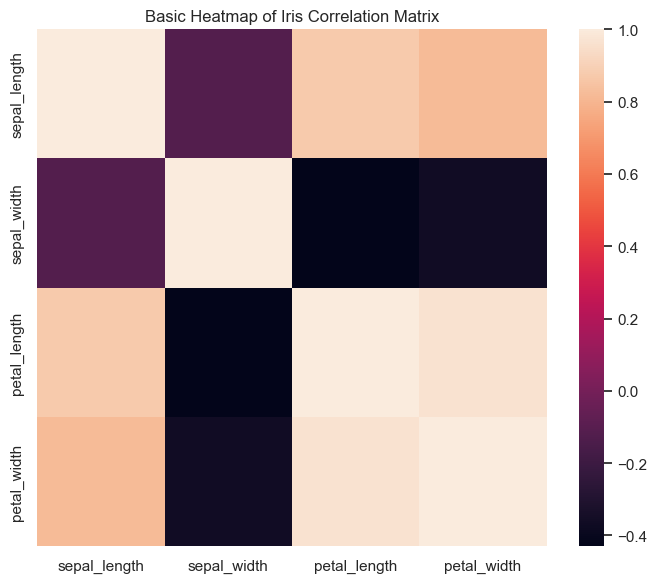

Generated basic heatmap.


In [6]:
print("--- 2. Heatmaps (sns.heatmap) ---")

# a) Basic heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(corr_matrix, ax=ax)
ax.set_title('Basic Heatmap of Iris Correlation Matrix')
plt.tight_layout()
plt.show()
print("Generated basic heatmap.")

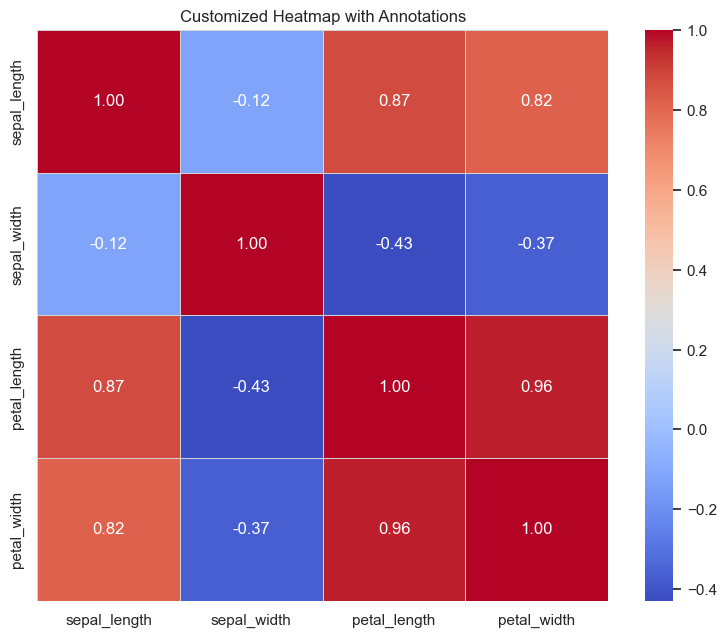

Generated customized heatmap.


In [7]:
# b) Customized heatmap
fig, ax = plt.subplots(figsize=(8, 6.5))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show data values on the heatmap cells
    fmt=".2f",       # Format annotations to 2 decimal places
    cmap='coolwarm', # Choose a diverging colormap (good for correlations)
    linewidths=0.5,  # Add lines between cells
    linecolor='lightgray',
    cbar=True,       # Show the color bar (default is True)
    square=True,     # Make cells square
    ax=ax
)
ax.set_title('Customized Heatmap with Annotations')
plt.tight_layout()
plt.show()
print("Generated customized heatmap.")

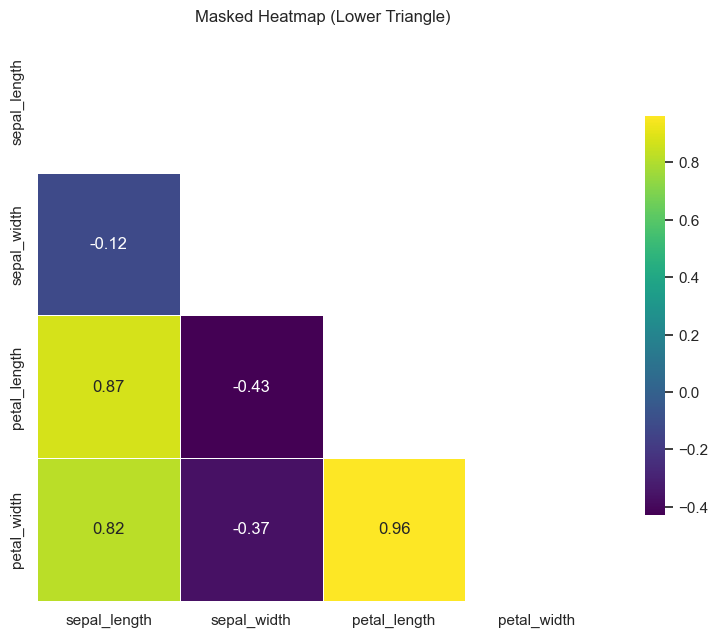

Generated masked heatmap.


In [8]:
# c) Heatmap with masking
# Often used to hide redundant parts (e.g., upper triangle of correlation matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Create a mask for the upper triangle

fig, ax = plt.subplots(figsize=(8, 6.5))
sns.heatmap(
    corr_matrix,
    mask=mask,         # Apply the mask
    annot=True,
    fmt=".2f",
    cmap='viridis',    # Use a different colormap
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .7} # Customize color bar size
)
ax.set_title('Masked Heatmap (Lower Triangle)')
plt.tight_layout()
plt.show()
print("Generated masked heatmap.")

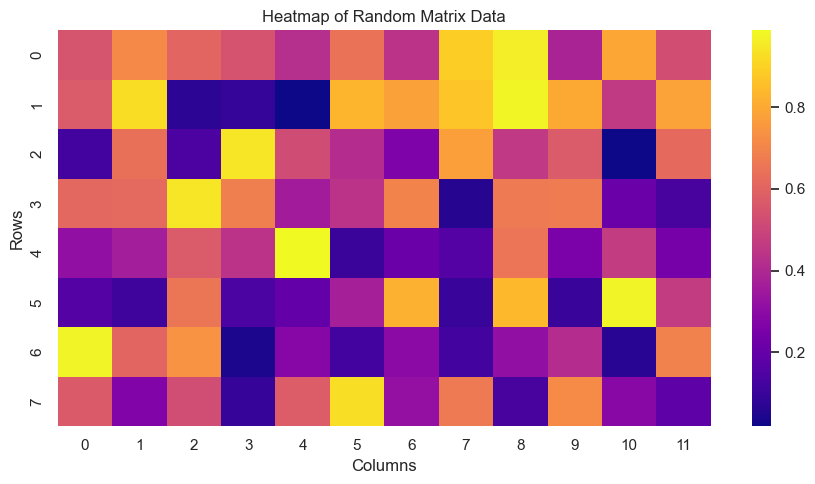

Generated heatmap of random data.
------------------------------


In [9]:
# d) Heatmap of the random matrix data
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(random_matrix, cmap='plasma', annot=False, cbar=True, ax=ax)
ax.set_title('Heatmap of Random Matrix Data')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
plt.tight_layout()
plt.show()
print("Generated heatmap of random data.")
print("-" * 30)

#### 3. Clustermaps (sns.clustermap)
- Creates a heatmap where rows and columns are reordered based on hierarchical clustering.
- Helps reveal patterns and groups in the data. This is a Figure-level function.

--- 3. Clustermaps (sns.clustermap) ---


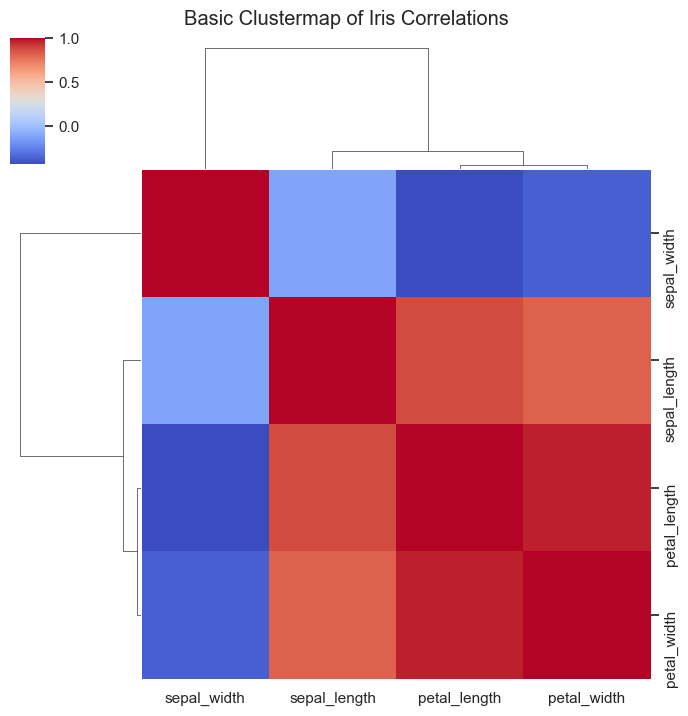

Generated basic clustermap.


In [10]:
print("--- 3. Clustermaps (sns.clustermap) ---")

# a) Basic clustermap of the correlation matrix
# Creates its own figure. Returns a ClusterGrid object.
clustergrid = sns.clustermap(
    corr_matrix,
    figsize=(7, 7),
    cmap='coolwarm'
)
clustergrid.fig.suptitle('Basic Clustermap of Iris Correlations', y=1.02) # Add title to figure
plt.show()
print("Generated basic clustermap.")

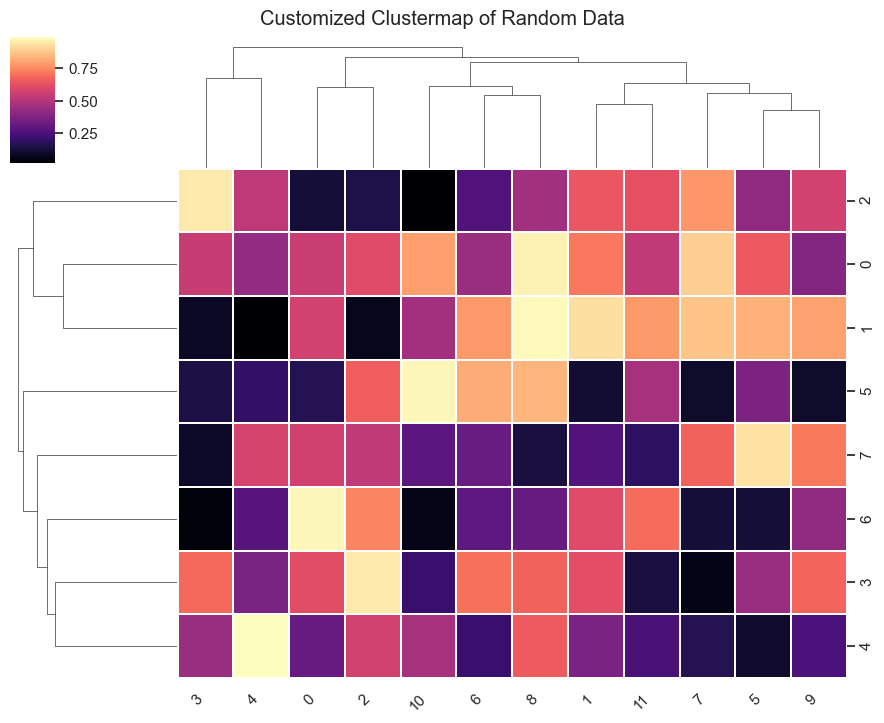

Generated customized clustermap.
------------------------------


In [11]:
# b) Customized clustermap
# Can customize heatmap arguments (annot, fmt), clustering method/metric, colors etc.
clustergrid_custom = sns.clustermap(
    random_matrix,
    figsize=(9, 7),
    cmap='magma',
    annot=False, # Annotations can get crowded on clustermaps
    linewidths=0.2,
    # Change clustering method/metric
    method='average', # e.g., 'single', 'complete', 'average', 'ward'
    metric='euclidean', # e.g., 'euclidean', 'correlation', 'cityblock'
    # Standardize data before clustering (optional, common)
    # standard_scale=1 # Standardize along rows (axis=1) or columns (axis=0)
    row_cluster=True, # Enable/disable row clustering
    col_cluster=True  # Enable/disable column clustering
)
clustergrid_custom.fig.suptitle('Customized Clustermap of Random Data', y=1.02)
# Rotate column labels if needed
plt.setp(clustergrid_custom.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()
print("Generated customized clustermap.")
print("-" * 30)